In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.io import loadmat
from scipy.interpolate import griddata

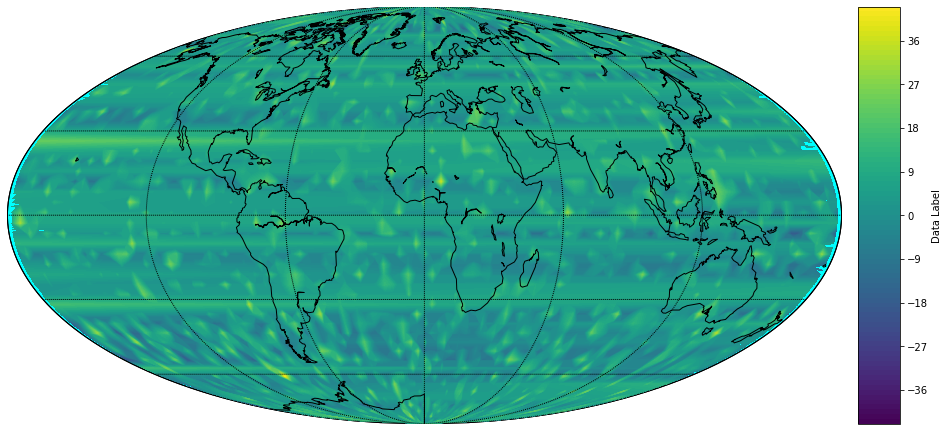

In [6]:
maglat = loadmat("mag_lat.mat")['mag_lat'];

plt.figure(figsize=(16,8))
m = Basemap(projection='moll',lon_0=0,resolution='c')

m.drawcoastlines()

# Comment to remove continent filling
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawparallels(np.arange(-90.,120.,30.))

# Longitude lines
m.drawmeridians(np.arange(0.,420.,60.))

# Fill oceans with blue color
m.drawmapboundary(fill_color='aqua');

nlats = 100; nlons = 100; delta = 2.*np.pi/(nlons-1)
lats = (0.5*np.pi-delta*np.indices((nlats,nlons))[0,:,:])
lons = (delta*np.indices((nlats,nlons))[1,:,:])

x, y = m(lons*180./np.pi, -lats*180./np.pi)

# Geomagnetic latitudes
#m.contour(x,y,maglat, 12, colors='k', linestyles='--', linewidths=1);

# Insert data here
fake_data = 10*np.random.randn(np.shape(x)[0], np.shape(x)[1]);
pHandle = m.contourf(x,y,fake_data, 100, alpha=1);
m.colorbar(pHandle, label='Data Label');

In [30]:
df = pd.read_csv("cleaned_data.csv")

may not be what you expect.  If it looks odd, your can either
adjust the map projection region to be consistent with your data, or
(if your data is on a global lat/lon grid) use the shiftgrid
function to adjust the data to be consistent with the map projection
region (see examples/contour_demo.py).

ValueError: operands could not be broadcast together with shapes (180,90) (100,100) 

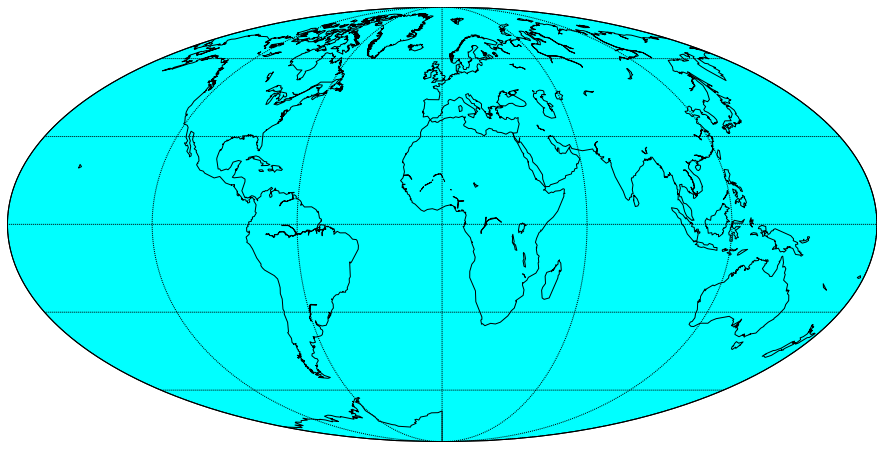

In [32]:
plt.figure(figsize=(16,8))
m = Basemap(projection='moll',lon_0=0,resolution='c')

m.drawcoastlines()

# Comment to remove continent filling
#m.fillcontinents(color='coral',lake_color='aqua')

m.drawparallels(np.arange(-90.,120.,30.))

# Longitude lines
m.drawmeridians(np.arange(0.,420.,60.))

# Fill oceans with blue color
m.drawmapboundary(fill_color='aqua');

nlats = 100; nlons = 100; delta = 2.*np.pi/(nlons-1)

# x, y = m(lons*180./np.pi, -lats*180./np.pi)
lon = df.lon[:100]
lat = df.lat[:100]
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# Insert data here


pHandle = m.contourf(x, y, data, 100, alpha=1);
#m.colorbar(pHandle, label='Data Label');

In [17]:
plt.figure(figsize=(16,8))
m = Basemap(projection='moll',lon_0=0,resolution='c')


0      7.4738
1     46.2923
2      7.4021
3      2.1522
4     13.6076
       ...   
95    45.8882
96    25.9808
97     3.2430
98    19.6126
99    11.1295
Name: lat, Length: 100, dtype: float64


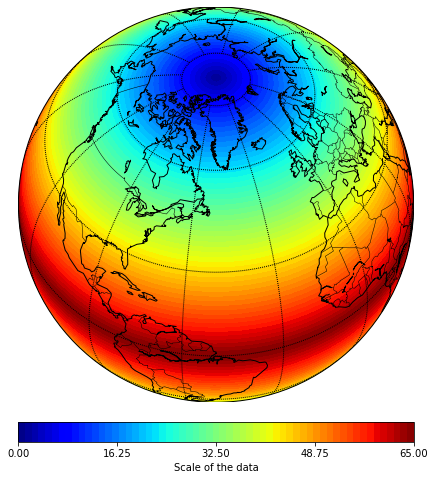

In [29]:
# data for z (2D array)
h2o_north = np.linspace(1, 65, num=90)
h2o_south = np.flipud(h2o_north)
h2o = np.append(h2o_north, h2o_south)
data = np.transpose(np.tile(h2o, (len(h2o_north), 1)))

# create figure and axes instances
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(projection='ortho', lon_0=-50, lat_0=50, resolution='c', ax=ax)

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = np.linspace(-90, 90, data.shape[0])
lon = np.linspace(-180, 180, data.shape[1])
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# draw filled contours
clevs = np.linspace(0, np.max(data), 60)
cs = m.contourf(x, y, data, clevs, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawcountries()

m.drawmeridians(range(-180, 180, 30))
m.drawparallels(range(-90, 90, 30))

# draw colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%", ticks=np.linspace(0, np.max(data), 5))
cbar.set_label('Scale of the data')

plt.show()

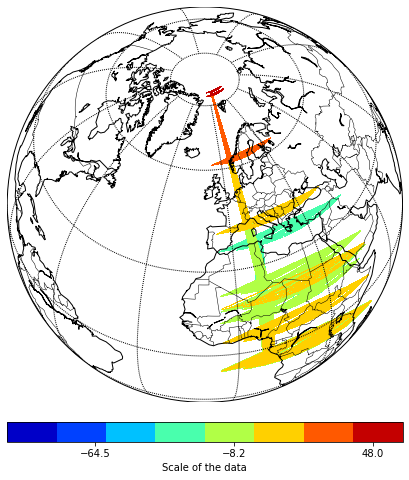

In [7]:
# data for z (2D array)
h2o_north = np.linspace(1, 65, num=90)
h2o_south = np.flipud(h2o_north)
h2o = np.append(h2o_north, h2o_south)
peak_current = df["Peak Current[kA]"]
peak_current = peak_current[:100]
data = np.transpose(np.tile(peak_current, (len(peak_current), 1)))

# create figure and axes instances
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot()

# create basemap instance
m = Basemap(projection='ortho', lon_0=-10, lat_0=50, resolution='c', ax=ax)

# create meshgrid covering the whole globe with ...
# conforming dimensions of the `data`
lat = df.lon[:100]
lon = df.lat[:100]
xs, ys = np.meshgrid(lon, lat)   # basic mesh in lon, lat (degrees)
x, y = m(xs, ys)                 # convert (lon,lat) to map (x,y)

# draw filled contours
cs = m.contourf(x, y, data, cmap=plt.cm.jet)
m.drawcoastlines()
m.drawcountries()

m.drawmeridians(range(-180, 180, 30))
m.drawparallels(range(-90, 90, 30))

# draw colorbar
cbar = m.colorbar(cs, location='bottom', pad="5%", ticks=np.linspace(np.min(data), np.max(data), 5))
cbar.set_label('Scale of the data')

plt.show()